##### 線性漸層填色
這篇教學會介紹使用 OpenCV 搭配 NumPy，產生線性漸層填色 ( 實色漸層、半透明漸層 ) 的圖像。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 產生實色線性漸層 
通常一般的圖片在程式的結構裡，都是使用「三維陣列」表現。

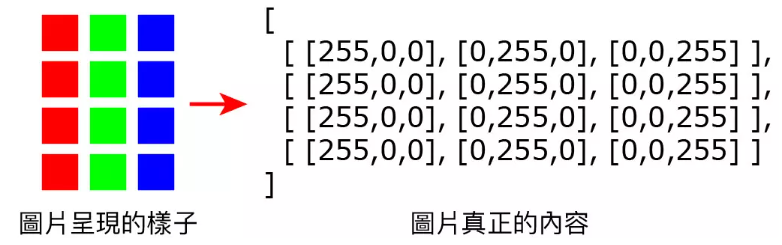

因此可以使用 NumPy 的 zeros 方法，快速產生一個全黑的三維陣列，搭配 for 迴圈與 NumPy 的陣列賦值機制，\
就能快速產生漸層陣列，由於 NumPy 陣列內容預設為 64 位 float 類型，而 OpenCV 的 imshow 不能印出該類型，\
必須經過「astype('float32')/255」轉換後才能正常顯示 ( 如果使用 imwrite 儲存則沒有影響 )，\
下方的程式碼執行後，會產生從上往下的綠色漸層。

參考：[陣列項目賦值](https://steam.oxxostudio.tw/category/python/numpy/array-assignment.html)

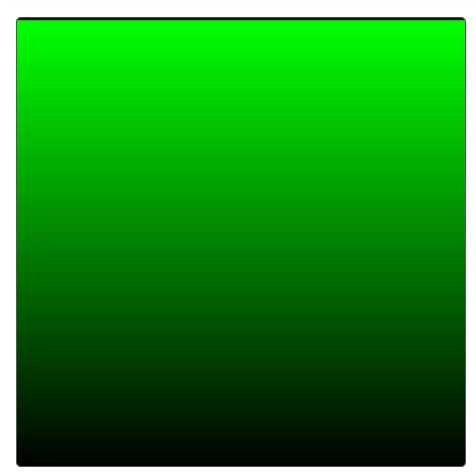

In [3]:
import cv2
import numpy as np

w, h = 400, 400
img = np.zeros([h,w,3])
for i in range(h):
    img[i,:,1] = int(256*i/400)   # 從上往下填入綠色漸層

img = img.astype('float32')/255   # 轉換內容類型

cv2.imshow('oxxostudio', img)
cv2.waitKey(0)                    # 按下任意鍵停止
cv2.destroyAllWindows()

下方的程式碼執行後，會產生左上到右下的紫色漸層。

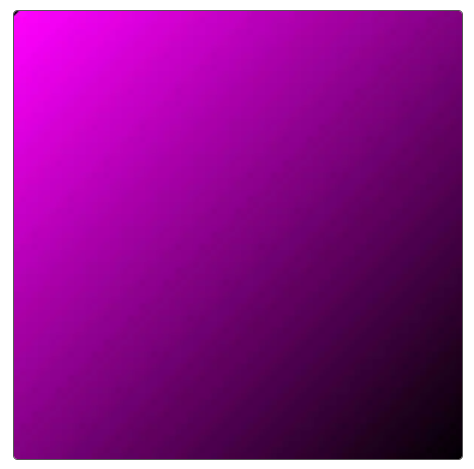

In [4]:
import cv2
import numpy as np

w = 400
h = 400
img = np.zeros([h,w,3])
for i in range(h):
    for j in range(w):
        img[i,j,0] = int(256*(j+i)/(w+h))
        img[i,j,2] = int(256*(j+i)/(w+h))

img = img.astype('float32')/255

cv2.imshow('oxxostudio', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### 產生半透明線性漸層 
如果將表現圖片像素陣列改成四個項目，就可以加入透明度的色版 ( alpha channel )，透明度範圍從 0～255，0 表示全透明，\
255 表示不透明，儲存為 png 格式就可以看到半透明的漸層，下方的程式碼會產生從上往下黑色到透明的漸層。

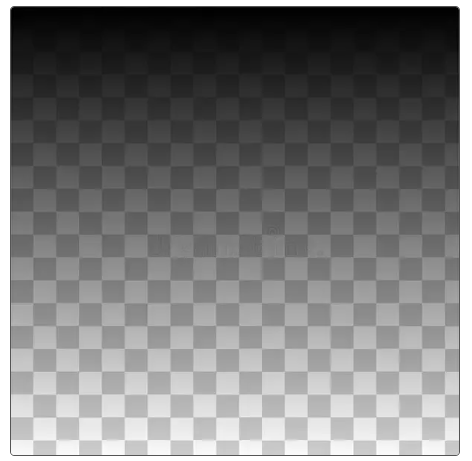

In [6]:
import cv2
import numpy as np

w = 400
h = 400
img = np.zeros([h,w,4])             # 第三個值為 4
for i in range(h):
    img[i,:,3] = int(256*i/400)     # 設定第四個值 ( 透明度 )

img = img.astype('float32')/255

cv2.imwrite('oxxostudio.png', img)  # 儲存為 png
cv2.waitKey(0)
cv2.destroyAllWindows()